# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.src.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


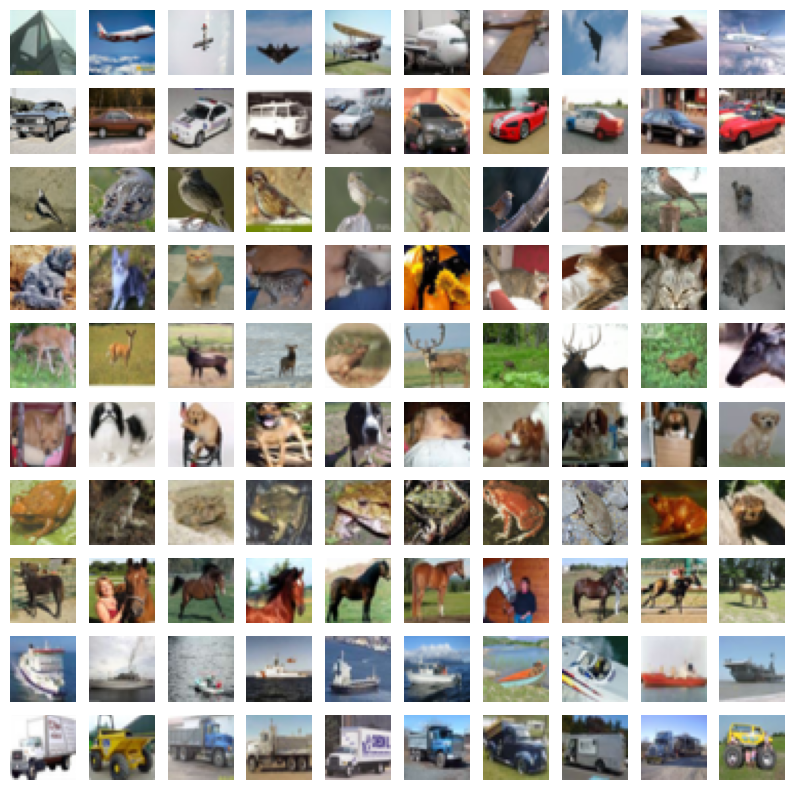

In [3]:
# Create a figure and axes for plotting
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Get the unique classes in CIFAR-10
classes = np.unique(y_train)

# Loop through each class
for i, cls in enumerate(classes):
  # Filter images belonging to the current class
  class_indices = np.where(y_train == cls)[0]

  # Randomly select 10 images from the filtered indices
  random_indices = np.random.choice(class_indices, 10, replace=False)

  # Display each selected image
  for j, idx in enumerate(random_indices):
    axes[i * 10 + j].imshow(x_train[idx])
    axes[i * 10 + j].axis('off')

# Display the plot
plt.show()

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
def print_compare(history):
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.show()

  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='green', label='train')
  plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
keras.backend.clear_session()

In [8]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(32,32,3)),
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=60, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8167 - loss: 0.5589 - val_accuracy: 0.6628 - val_loss: 1.0187
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8198 - loss: 0.5565 - val_accuracy: 0.6667 - val_loss: 1.0045
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8160 - loss: 0.5582 - val_accuracy: 0.6641 - val_loss: 1.0075
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8252 - loss: 0.5430 - val_accuracy: 0.6639 - val_loss: 1.0179
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8153 - loss: 0.5672 - val_accuracy: 0.6661 - val_loss: 1.0078
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8231 - loss: 0.5458 - val_accuracy: 0.6667 - val_loss: 1.0147
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8187 - loss: 0.5553 - val_accuracy: 0.6660 - val_loss: 1.0047
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8235 - loss: 0.5413 - val_accuracy: 0.6612 - val

*   Plot the cross entropy loss curve and the accuracy curve

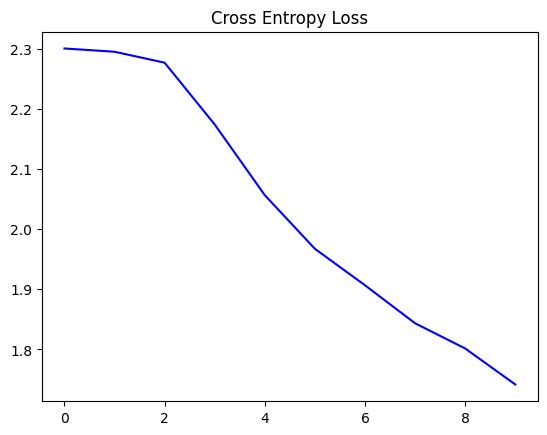

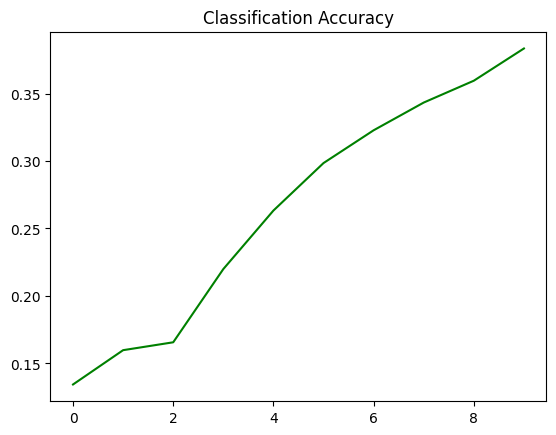

In [41]:
print_compare(history)

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [19]:
keras.backend.clear_session()

In [20]:
model2 = keras.Sequential(
    [
        keras.layers.Input(shape=(32,32,3)),
        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
        keras.layers.Dense(10, activation="softmax")
    ]
)
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [21]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.1806 - loss: 2.2097 - val_accuracy: 0.2973 - val_loss: 1.9821
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3004 - loss: 1.9765 - val_accuracy: 0.3520 - val_loss: 1.8617
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3606 - loss: 1.8403 - val_accuracy: 0.3355 - val_loss: 1.9007
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3972 - loss: 1.7435 - val_accuracy: 0.3968 - val_loss: 1.6929
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4151 - loss: 1.6728 - val_accuracy: 0.4120 - val_loss: 1.6566
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4338 - loss: 1.6177 - val_accuracy: 0.4226 - val_loss: 1.6124
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4470 - loss: 1.5701 - val_accuracy: 0.4507 - val_loss: 1.5635
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4618 - loss: 1.5240 - val_accuracy: 0.4727 - v

In [34]:
_, test_acc = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6321 - loss: 1.0660
Test accuracy: 0.6272000074386597


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


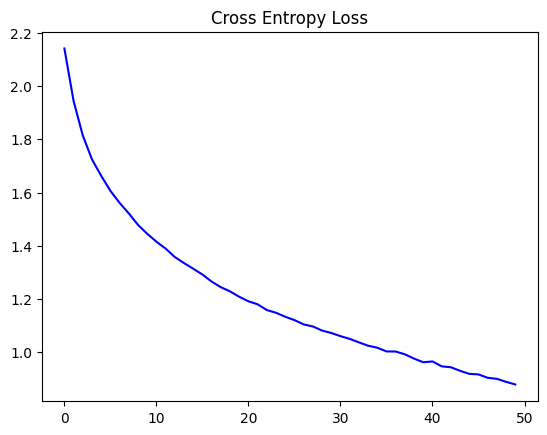

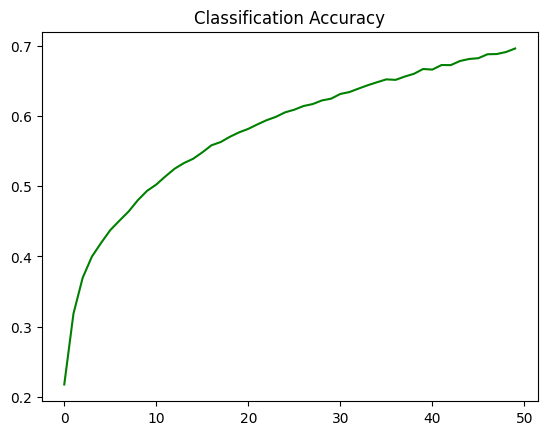

In [42]:
print_compare(history2)

**Comment on the observation**

it is a abit slower but butter result...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


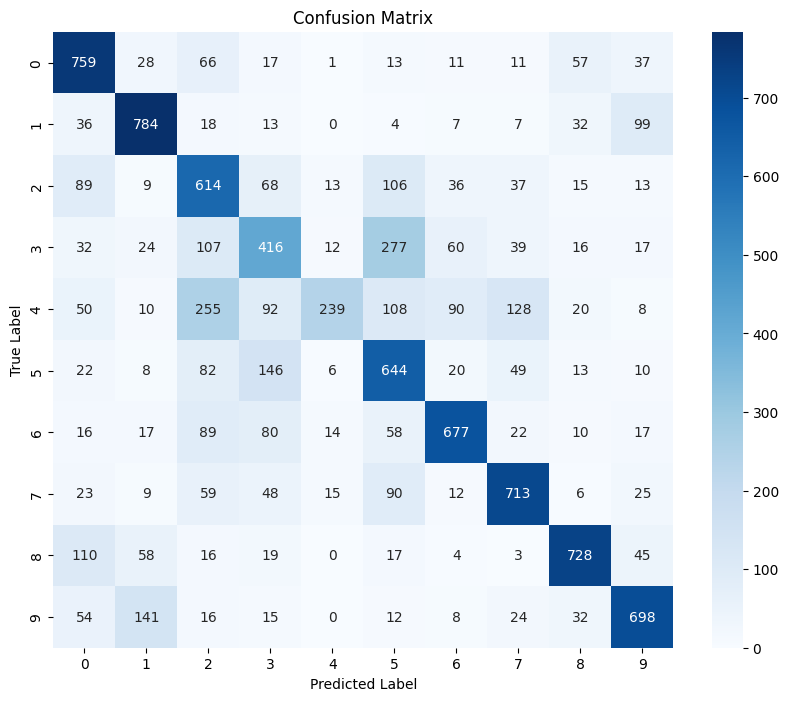

In [23]:
predictions = model2.predict(x_test)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

There is significant room for improvement. While the true positives outnumbered the false positives, certain misclassifications stand out. For instance, in class 0, there were 172 false positives misclassified as class 8. Similarly, in class 2, there were 200 false positives misclassified as class 9

*    Print the test accuracy for the trained model.

In [28]:
test_loss, test_acc = model2.evaluate(x_test, y_test)  # Use y_test directly
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6321 - loss: 1.0660
Test loss: 1.0783840417861938
Test accuracy: 0.6272000074386597


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [29]:
# Resize the CIFAR-10 images from 32x32 to 64x64
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

print(x_train_resized.shape)
print(x_test_resized.shape)

(50000, 64, 64, 3)
(10000, 64, 64, 3)


In [30]:
keras.backend.clear_session()

In [31]:
model3 = keras.Sequential(
    [
        keras.layers.Input(shape=(64, 64, 3)),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [32]:
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model3.fit(x_train_resized, y_train, epochs=10, batch_size=512, validation_data=(x_test_resized, y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 125s 874ms/step - accuracy: 0.1159 - loss: 2.3015 - val_accuracy: 0.1603 - val_loss: 2.2982
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 386ms/step - accuracy: 0.1617 - loss: 2.2967 - val_accuracy: 0.1546 - val_loss: 2.2896
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 380ms/step - accuracy: 0.1622 - loss: 2.2844 - val_accuracy: 0.2043 - val_loss: 2.2511
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.2080 - loss: 2.2156 - val_accuracy: 0.2005 - val_loss: 2.1159
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.2485 - loss: 2.0897 - val_accuracy: 0.3198 - val_loss: 1.9594
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.2959 - loss: 1.9778 - val_accuracy: 0.3328 - val_loss: 1.8883
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.3151 - loss: 1.9205 - val_accuracy: 0.3080 - val_loss: 1.9448
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.3373 - loss: 1.8600 - val_acc

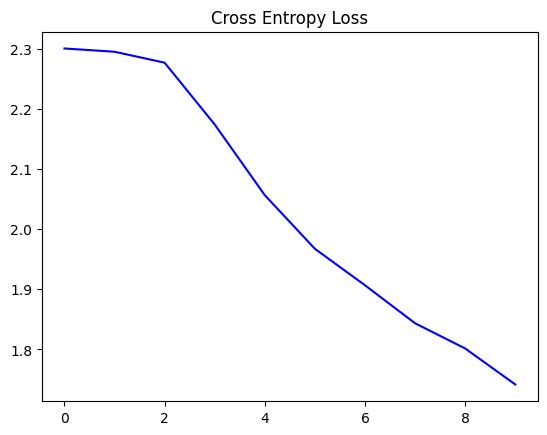

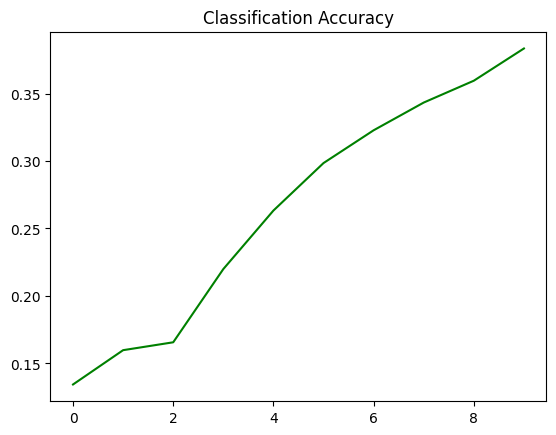

In [43]:
print_compare(history)

In [39]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6321 - loss: 1.0660
Test loss: 1.0783840417861938
Test accuracy: 0.6272000074386597


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


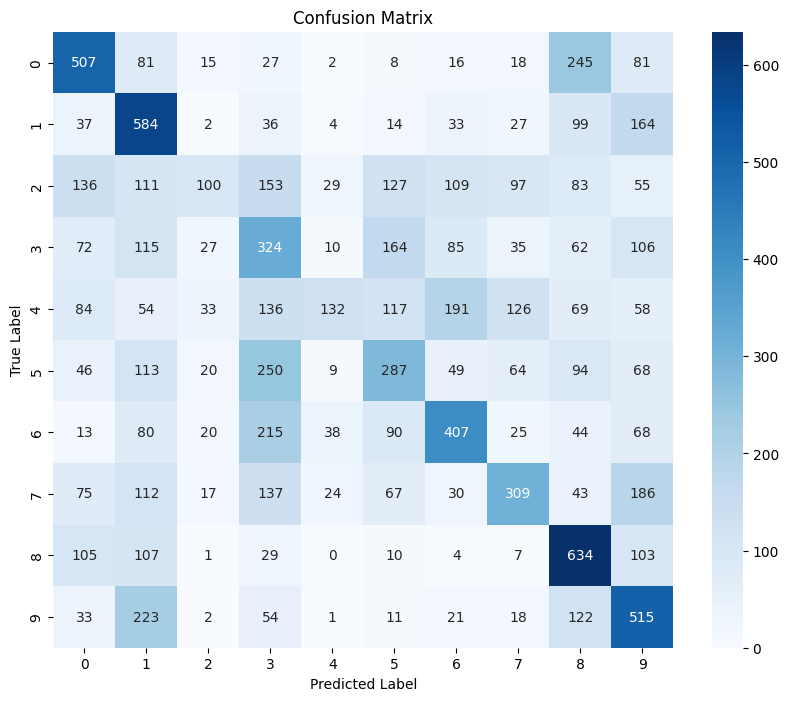

In [40]:
predictions = model3.predict(x_test_resized)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2491 - loss: 2.0645 - val_accuracy: 0.4010 - val_loss: 1.6889
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4415 - loss: 1.5835 - val_accuracy: 0.5079 - val_loss: 1.3852
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5228 - loss: 1.3553 - val_accuracy: 0.5530 - val_loss: 1.2531
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5799 - loss: 1.1968 - val_accuracy: 0.5813 - val_loss: 1.1768
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6238 - loss: 1.0854 - val_accuracy: 0.6088 - val_loss: 1.1222
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6459 - loss: 1.0164 - val_accuracy: 0.6232 - val_loss: 1.0656
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6736 - loss: 0.9459 - val_accuracy: 0.6351 - val_loss: 1.0390
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6958 - loss: 0.8953 - val_accuracy: 0.

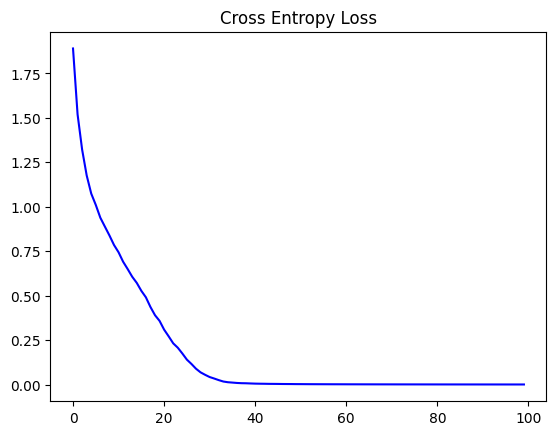

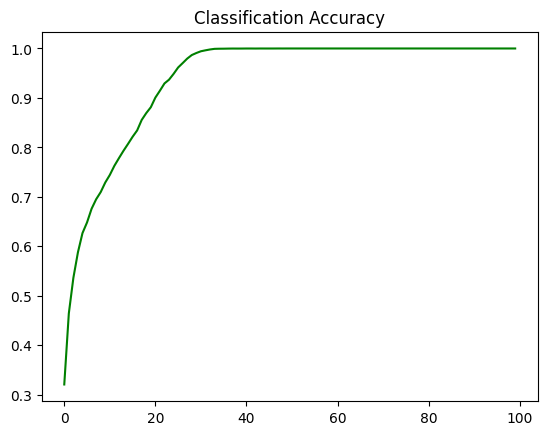

In [44]:

keras.backend.clear_session()
model2 = keras.Sequential(
    [
        keras.layers.Input(shape=(32,32,3)),
        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
        keras.layers.Dense(10, activation="softmax")
    ]
)
model2.summary()

optimizer = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_test, y_test))

_, test_acc = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

print_compare(history2)

The model will improve my time, I think with more epoches the result can be not too bad. The overfitting has improved, the validation and the train values are close each other.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Purpose of Activation Functions: Activation functions add non-linearity to neural networks, allowing them to model and learn complex patterns present in the input data, similar to natural phenomena.

_

2 - Difference Between Sigmoid and Softmax: Sigmoid functions are ideal for binary classification tasks, whereas softmax is better suited for multi-class classification as it provides a probability distribution across multiple classes.

_

3 - Difference Between Categorical Crossentropy and Binary Crossentropy: Categorical crossentropy is designed for multi-class classification problems, while binary crossentropy is tailored for binary classification tasks.



